# Customer Segmentation Analysis using K-Means Clustering
This project implements customer segmentation using K-Means clustering to identify distinct customer groups based on demographic and behavioral data. The goal is to help businesses understand their customer base and develop targeted marketing strategies.

## 1. Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## 2. Load and Preprocess Data

In [2]:
df = pd.read_csv('customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Convert categorical Gender column to numerical values

In [3]:
df = df.replace({'Male': 1, 'Female': 0})
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


In [4]:
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

## 3. Prepare Data for Clustering

In [5]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
clus_data = df[features].values

## 4. Determine Optimal Number of Clusters (Elbow Method)
We draw a plot to choose K based on the Elbow Method

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Test K values from 1 to 10
n = range(1, 11)
inertia_values = []

for k in n:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
    kmeans.fit(clus_data)
    inertia_values.append(kmeans.inertia_)


# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(n, inertia_values, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal K Selection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(n)

plt.tight_layout()

plt.show()


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


<Figure size 1000x600 with 1 Axes>

Optimal K = 5

## 5. Apply K-Means Clustering

In [7]:
optimal_k = 5
kmeans_2 = KMeans(n_clusters = optimal_k, init='k-means++', n_init=12, random_state=42)
kmeans_2.fit(clus_data)

# Get cluster labels for each customer
labels_1 = kmeans_2.labels_
print(labels_1)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Add cluster labels to original dataframe

In [8]:
kmeans_df = df.copy()
kmeans_df['Cluster'] = labels_1
kmeans_df = kmeans_df.drop('CustomerID', axis = 1)
print(kmeans_df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0         1   19                  15                      39        0
1         1   21                  15                      81        4
2         0   20                  16                       6        0
3         0   23                  16                      77        4
4         0   31                  17                      40        0
..      ...  ...                 ...                     ...      ...
195       0   35                 120                      79        1
196       0   45                 126                      28        2
197       1   32                 126                      74        1
198       1   32                 137                      18        2
199       1   30                 137                      83        1

[200 rows x 5 columns]


## 6. Analyze Cluster Characteristics

In [9]:
kmeans_df.groupby('Cluster').mean()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.391304,45.217391,26.304348,20.913043
1,0.461538,32.692308,86.538462,82.128205
2,0.513514,40.324324,87.432432,18.189189
3,0.417722,43.126582,54.822785,49.835443
4,0.409091,25.272727,25.727273,79.363636


## 7. Visualize Clusters using PCA

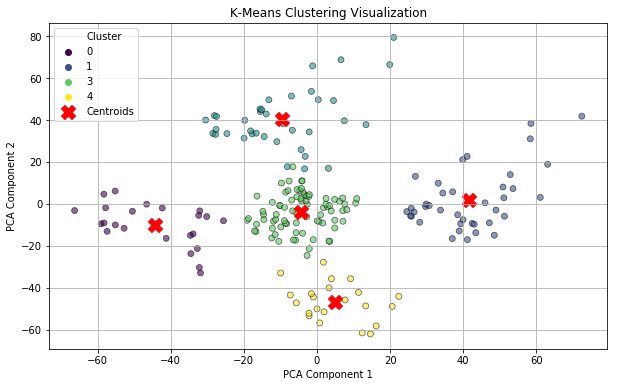

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clus_data)

# Create a DataFrame for visualization
kmeans_df['PCA1'] = principal_components[:, 0]
kmeans_df['PCA2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=kmeans_df['PCA1'], 
    y=kmeans_df['PCA2'], 
    hue=kmeans_df['Cluster'], 
    palette='viridis', 
    alpha=0.6, 
    edgecolor='k'
)

# Plot the cluster centroids
centroids_pca = pca.transform(kmeans_2.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='red', label='Centroids')

# Configure the plot
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization")
plt.legend()
plt.grid(True)
plt.show()



# Evaluation

In [11]:
from sklearn.metrics import silhouette_score
score_1 = silhouette_score(clus_data, labels_1)
print(f'Slihouette Score1 = {score_1 :0.2f}')


Slihouette Score1 = 0.44


Reasonable cluster structure!